<a href="https://colab.research.google.com/github/eilerld/eilerld/blob/main/Lora_Rose_PYF_Project_LearnerNotebook_FullCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

## Context

- The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles.
- Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.
- The app allows the restaurants to receive a direct online order from a customer.
- The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant.
- The delivery person then uses the map to reach the restaurant and waits for the food package.
- Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food.
- The delivery person confirms the drop-off in the app after delivering the food package to the customer.
- The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

## Objective

- The food aggregator company has stored the data of the different orders made by the registered customers in their online portal.
- They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience.
- Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. - Perform the data analysis to find answers to these questions that will help the company to improve the business.

## Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

## Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Command to tell Python to actually display the graphs
%matplotlib inline

### Understanding the structure of the data

In [ ]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# read the data
df = pd.read_csv('/content/drive/MyDrive/Week4ExploratoryDataAnalysis/foodhub_order.csv')

# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
df.shape
print(df.shape)
print('There are 1898 rows and 9 columns in this dataset.')

(1898, 9)
There are 1898 rows and 9 columns in this dataset.


#### _Question #1 Observations:_
- The data has 1898 rows and 9 columns in the dataset.


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### _Question #2 Observations:_
- The datatypes are int64(integer), float64(decimal), and objects(string).
  - float64 - 1 (cost_of_the_order)
  - int64 - 4 (order_id, customer_id, food_preparation_time, delivery_time)
  - object - 4 (restaurant_name, cuisine_type, day_of_the_week, rating)
- There is no null data, as all of the columns have a non-null count of 1898.
- Most of the numbered entries are integers, which are whole numbers.
- Cost of the order is a float, which is a decimal.
- The rest of the data are just objects, which are enclosed in "*".
- We could possibly turn the rating column into an integer and replace the "Not Given" response with NaN.



### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]


In [ ]:
#df.isnull() - (shows all True and False entries)
missing_values = df.isnull().sum()
print(missing_values)
print('-----------------------------')
total_missing_values = df.isnull().sum().sum()
print("The total number of missing values in the data is:", total_missing_values)

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64
-----------------------------
The total number of missing values in the data is: 0


#### _Question #3 Observations:_
- From this initial analysis, there does not appear to be any missing or null data values in the dataset.


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
df.describe(include='all').T # include=all shows all of the columns.

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,1898.0,NaN,NaN,NaN,1477495.5,548.049724,1476547.0,1477021.25,1477495.5,1477969.75,1478444.0
customer_id,1898.0,NaN,NaN,NaN,171168.478398,113698.139743,1311.0,77787.75,128600.0,270525.0,405334.0
restaurant_name,1898,178,Shake Shack,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cuisine_type,1898,14,American,584,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cost_of_the_order,1898.0,NaN,NaN,NaN,16.498851,7.483812,4.47,12.08,14.14,22.2975,35.41
day_of_the_week,1898,2,Weekend,1351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,1898,4,Not given,736,NaN,NaN,NaN,NaN,NaN,NaN,NaN
food_preparation_time,1898.0,NaN,NaN,NaN,27.37197,4.632481,20.0,23.0,27.0,31.0,35.0
delivery_time,1898.0,NaN,NaN,NaN,24.161749,4.972637,15.0,20.0,25.0,28.0,33.0


#### _Question #4 Observations_:
The food preparation times are as follows:
- minimum = 20 minutes
- average (mean) = 27.37 minutes
- maximum time = 35 minutes


### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
not_rated_orders = df['rating'].value_counts(dropna=False)
print(not_rated_orders)
#Another way
print('--------------------')
count_notgiven = df['rating'].str.contains('Not given').sum()
print("Number of orders not rated:", count_notgiven)

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64
--------------------
Number of orders not rated: 736


#### _Question #5 Observations:_
- There are 736 orders that are not rated.


# __Exploratory Data Analysis (EDA)__

## __Univariate Analysis__

### __Question 6:__
- Explore all the variables and provide observations on their distributions.  
- (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

American    584
Japanese    470
Italian     298
Chinese     215
Mexican      77
Name: cuisine_type, dtype: int64


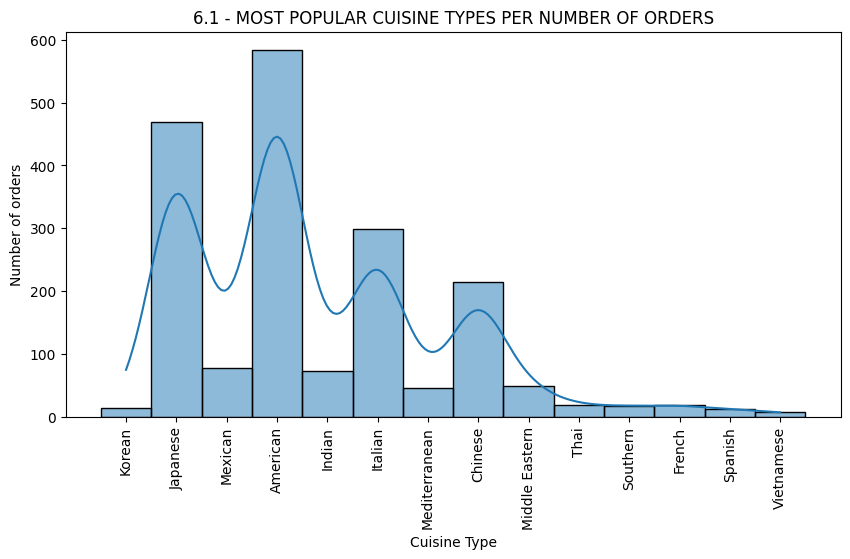

In [ ]:
# 6.1 - What is the most popular cuisine ordered?
# 1. Get counts of top 5
top_5 = df['cuisine_type'].value_counts().nlargest(5)
print(top_5)

# Create chart
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='cuisine_type', kde=True)

# Customize chart
plt.title('6.1 - MOST POPULAR CUISINE TYPES PER NUMBER OF ORDERS')
plt.xlabel('Cuisine Type')
plt.xticks(rotation=90, fontsize=10)
plt.ylabel('Number of orders')
plt.show()

#### _6.1 Observations for: What is the most popular cuisine ordered?_
Top 5 most popular cuisine types are:
  - American    584
  - Japanese    470
  - Italian     298
  - Chinese     215
  - Mexican      77
  - Vietnamese is the least favorite with ony 7 orders placed.





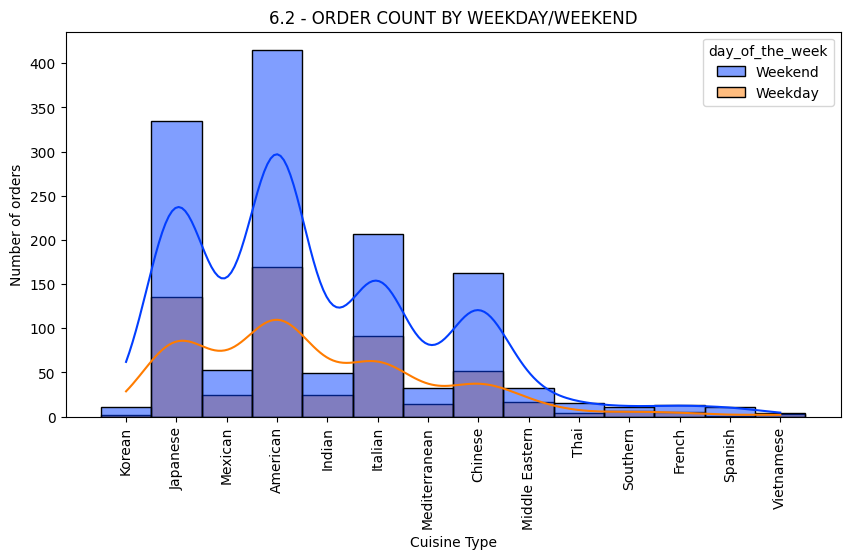

In [ ]:
# 6.2. Do more people order food on the week days or the weekends?
# Create chart
plt.figure(figsize=(10, 5))
sns.histplot(data=df,x="cuisine_type", hue="day_of_the_week", palette = 'bright', bins=10, kde=True)

# Customize chart
plt.title('6.2 - ORDER COUNT BY WEEKDAY/WEEKEND')
plt.xlabel('Cuisine Type')
plt.xticks(rotation=90, fontsize=10)
plt.ylabel('Number of orders')
plt.show()

#### _6.2 Observations for are more orders placed on the weekends or weekdays?_
- More people place orders during the weekend.
- American is the number one cuisine type both during week days and weekends. Japenese is the second highest.
- Vietnamese gets the least amount of orders during the weekdays and weekends.
- Most of the Korean order cuisine takes place during the weekend, as well as Thai, French and Southern, and Spanish.


Shake Shack                      219
The Meatball Shop                132
Blue Ribbon Sushi                119
Blue Ribbon Fried Chicken         96
Parm                              68
RedFarm Broadway                  59
RedFarm Hudson                    55
TAO                               49
Han Dynasty                       46
Blue Ribbon Sushi Bar & Grill     44
Name: restaurant_name, dtype: int64


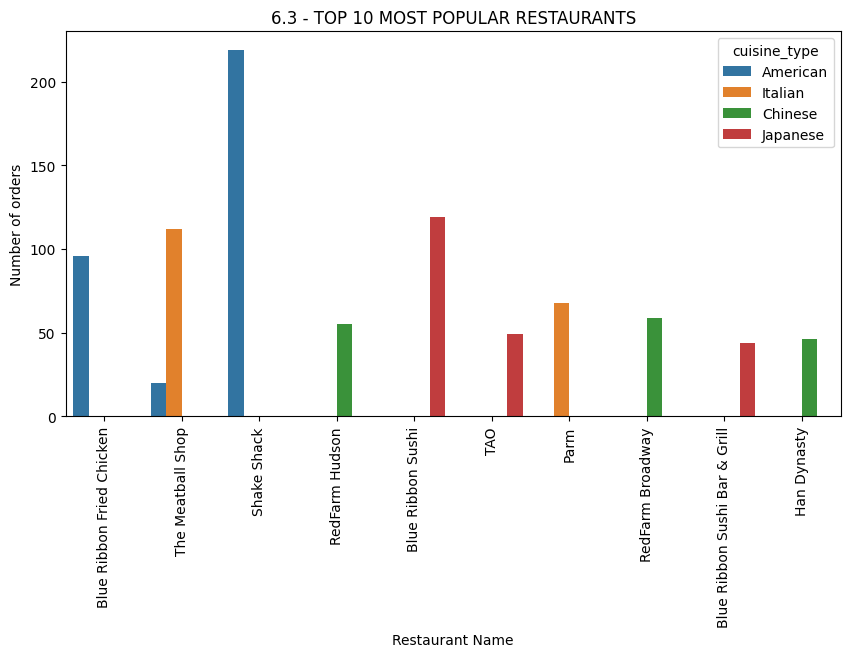

In [ ]:
# 6.3 Top 10 restaurants
# Print a list of the top 10 restaurants
top_10_restaurants = df['restaurant_name'].value_counts().head(10)
print(top_10_restaurants)

# Create chart
plt.figure(figsize=(10, 5))
sns.countplot(data=df[df['restaurant_name'].isin(['Shake Shack', 'The Meatball Shop', 'Blue Ribbon Sushi',
       'Blue Ribbon Fried Chicken', 'Parm', 'RedFarm Broadway','RedFarm Hudson', 'TAO',
        'Han Dynasty','Blue Ribbon Sushi Bar & Grill'])], x='restaurant_name', hue='cuisine_type')

# Customize chart
plt.title('6.3 - TOP 10 MOST POPULAR RESTAURANTS');
plt.xlabel('Restaurant Name')
plt.xticks(rotation=90, fontsize=10)
plt.ylabel('Number of orders')
plt.show()

#### _6.3 Observations for what are the top 10 most popular restaurants, in term of order counts?_
- Shake Shack is #1 with the most orders (250 orders), followed by Blue Ribbon Sushi (125 orders), The Meatball Shop (110 orders) and Blue Ribbon Fried Chicken (98 orders).
- The Meatball shop is the only restaurant that delivers both American and Italian cuisine.
- American cuisine is the the most ordered type of cuisine.
- Chinese cuisine has roughly the same amount of orders across the top 10 Chinese restaurants.

                          order_id  customer_id  restaurant_name  \
cuisine_type   rating                                              
American       3                64           64               64   
               4               130          130              130   
               5               174          174              174   
               Not given       216          216              216   
Chinese        3                24           24               24   
               4                40           40               40   
               5                69           69               69   
               Not given        82           82               82   
French         3                 2            2                2   
               4                 3            3                3   
               5                 5            5                5   
               Not given         8            8                8   
Indian         3                 5            5 

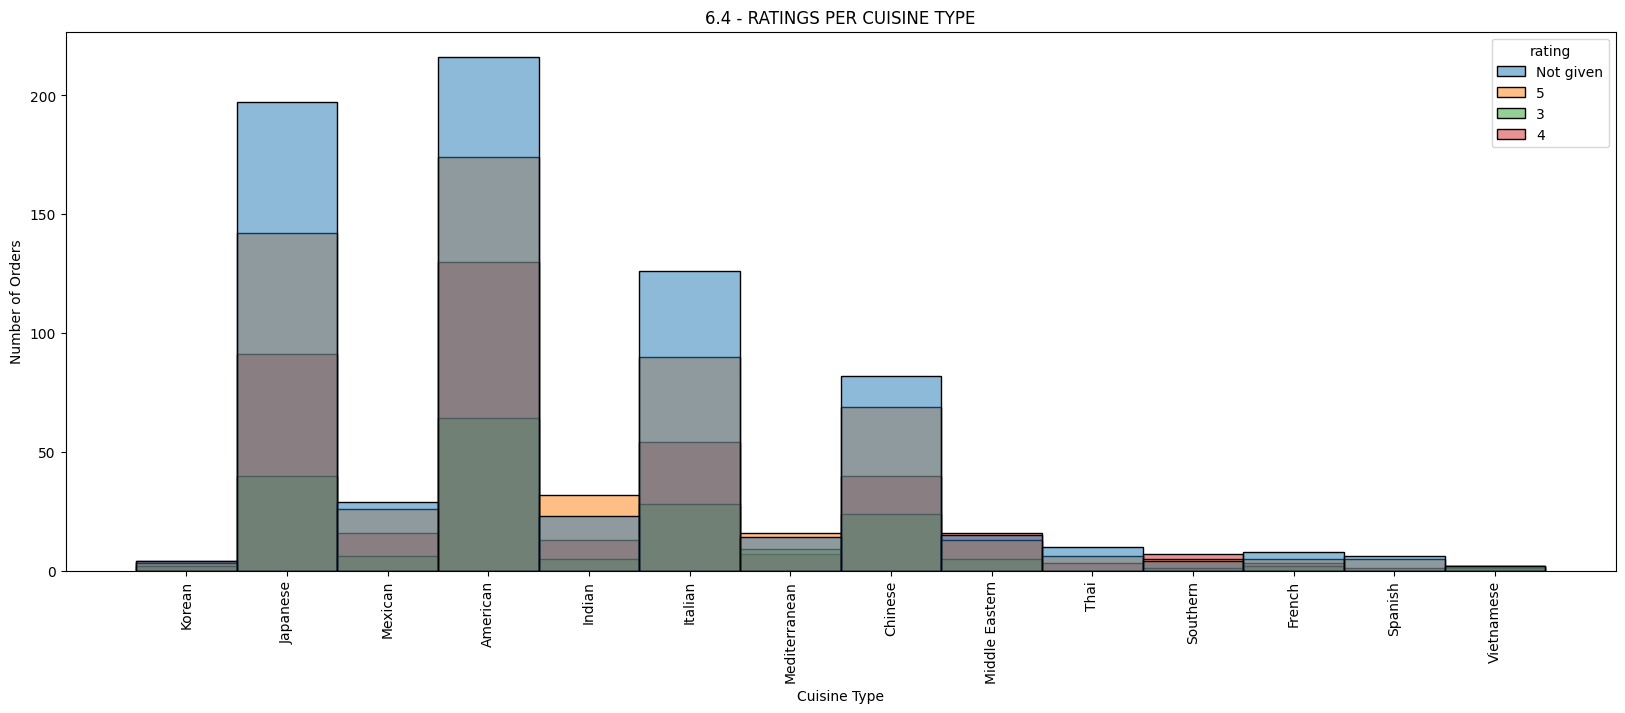

In [ ]:
# 6.4 RATINGS (What are the ratings for each type of cuisine?)
ratings_per_cuisine_type = df.groupby(['cuisine_type', 'rating']).count()
print(ratings_per_cuisine_type)

# Create chart
plt.figure(figsize=(20, 7))
sns.histplot(data=df, x='cuisine_type', hue='rating')

# Customize chart
plt.title('6.4 - RATINGS PER CUISINE TYPE')
plt.xlabel('Cuisine Type')
plt.xticks(rotation=90, fontsize=10)
plt.ylabel('Number of Orders')
plt.show()

#### _6.4 Observations for which cuisine type has the most ratings?_
- American cuisine had the most ratings (250).
- Japanese cuisine was 2nd with (200) ratings. Japanese also had the most 'not given' ratings (50).
- Italian cuisine was 3rd with (125) ratings.
- Chinese was 4th with (100) ratings.
- Vietnamese had the least number of ratings(10), but all of the ratings were a 5.

cuisine_type
American          35
Chinese           35
French            35
Indian            35
Italian           35
Japanese          35
Korean            33
Mediterranean     35
Mexican           35
Middle Eastern    34
Southern          35
Spanish           35
Thai              35
Vietnamese        33
Name: food_preparation_time, dtype: int64


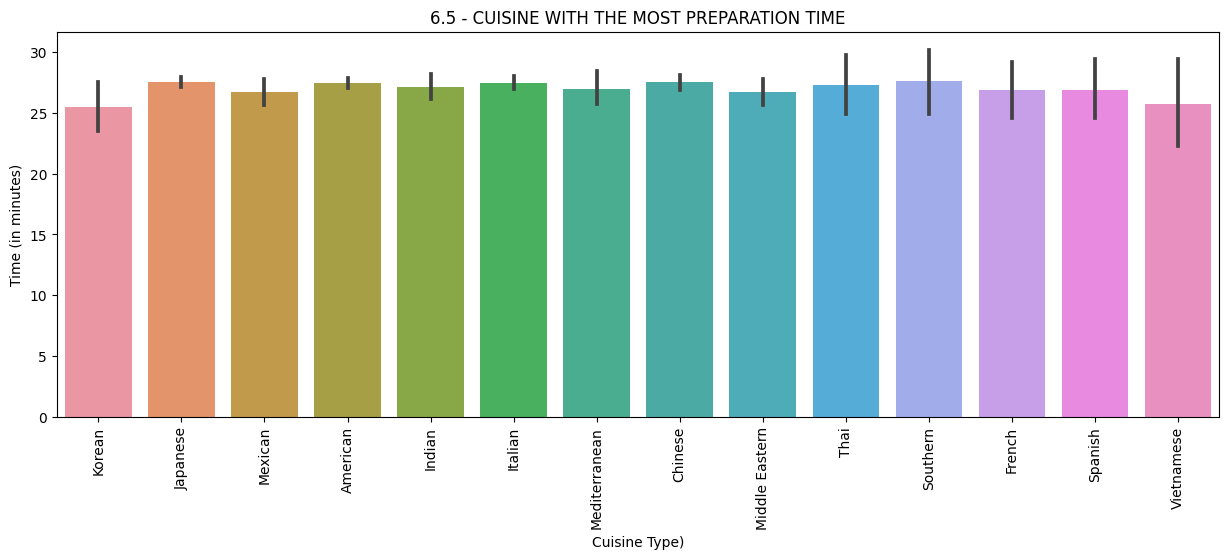

In [ ]:
# 6.5 Which cuisine took the longest to prepare?
# Get a list of prep times
#cuisine_prep_time = df.groupby('cuisine_type')['food_preparation_time'].mean()
cuisine_prep_time = df.groupby('cuisine_type')['food_preparation_time'].max('{:.2f}'.format)
#cuisine_prep_time = df.groupby('cuisine_type')['food_preparation_time'].min('{:.2f}'.format)
print(cuisine_prep_time)

# Create chart
plt.figure(figsize=(15, 5))
sns.barplot(data=df, x='cuisine_type', y='food_preparation_time')

# Customize chart
plt.title('6.5 - CUISINE WITH THE MOST PREPARATION TIME');
plt.xlabel('Cuisine Type)')
plt.xticks(rotation=90, fontsize=10)
plt.ylabel('Time (in minutes)')
plt.show()

####_6.5 Obervations for which cuisines have the longest preparation time?_
- There is not a noticeable difference in prep times, per cuisine, from min times in the 20 - 22 minute ranges, and max time in the 33 - 35 minute time ranges.
- Korean and Vietnamese had the least prep times (25 minutes).
- Chinese had the longest prep time of 27.511628 minutes.

52832     13
47440     10
83287      9
250494     8
259341     7
Name: customer_id, dtype: int64


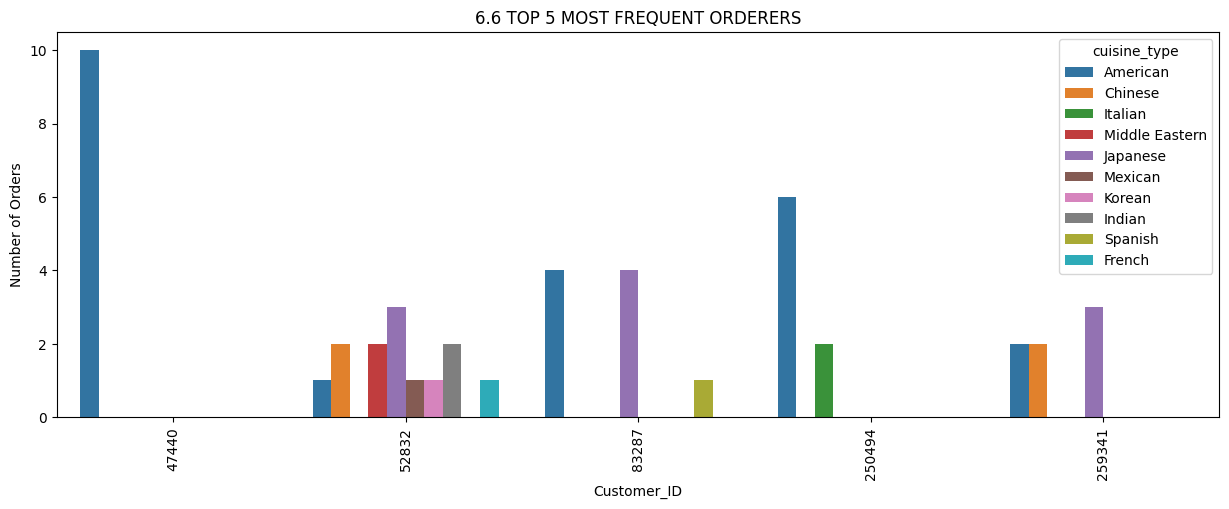

In [ ]:
# 6.6 - TOP 5 CUSTOMERS WHO ORDERED THE MOST FREQUENTLY
# 1. Get a list of the most frequent customers
best_customers = df['customer_id'].value_counts().nlargest(5)
print(best_customers)

# Create chart
plt.figure(figsize=(15,5))
sns.countplot(data=df[df['customer_id'].isin([52832, 47440, 83287, 250494, 259341])], x='customer_id', hue='cuisine_type')

# Customize chart
plt.title('6.6 TOP 5 MOST FREQUENT ORDERERS')
plt.xlabel('Customer_ID');
plt.xticks(rotation=90, fontsize=10)
plt.ylabel('Number of Orders')
plt.show()

#### _6.6 Observations on who are our top 5 customers, in terms of orders given?

- 52832 - 13 orders (ordered a variety of different cuisines, but ordered Japanese the most)
- 47440 - 10 orders (all orders were for American cuisine)
- 83287- 9 orders (order types were not similar(American, Japanese, and Spanish cuisine)
- 250494 - 8 (ordered American and Italian cuisine)
- 259341 - 7 orders (ordered American, Chinese, and Japanese cuisine)


Total number of unique restaurants: 178
-----------------------------------
      cuisine_type  restaurant_name
0         American               41
1          Chinese               16
2           French                3
3           Indian               14
4          Italian               31
5         Japanese               29
6           Korean                5
7    Mediterranean                5
8          Mexican               11
9   Middle Eastern                7
10        Southern                2
11         Spanish                3
12            Thai                9
13      Vietnamese                3


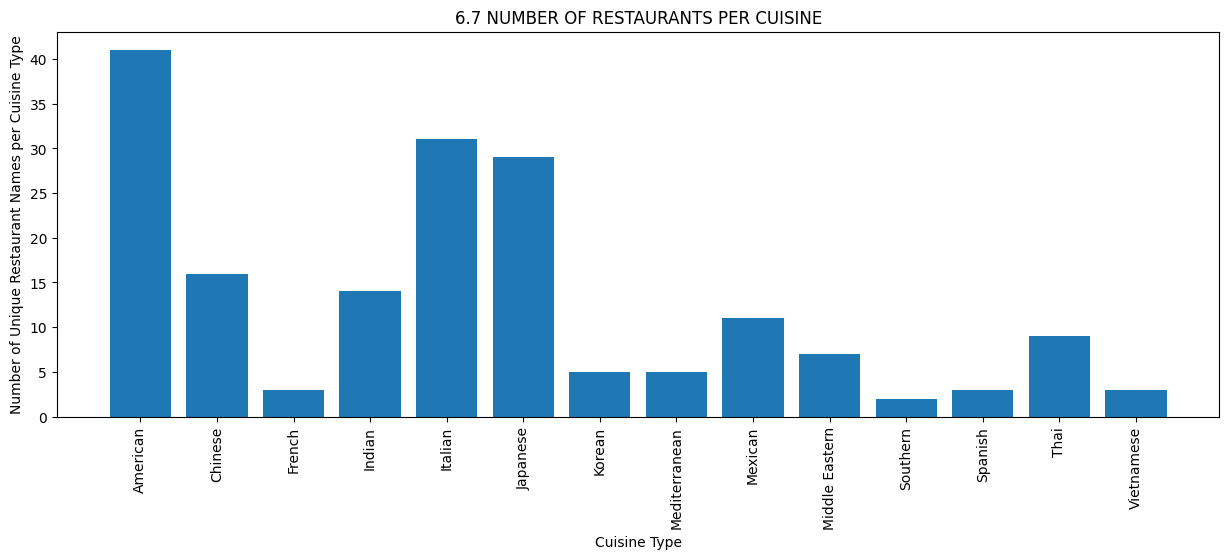

In [ ]:
# 6.7 Number of restaurants per cuisine type
restaurant_sum = total_restaurants = len(df['restaurant_name'])

# 1. Get total number of unique restaurants
unique_restaurants = df['restaurant_name'].nunique()
print('Total number of unique restaurants:', unique_restaurants)
print('-----------------------------------')

# 2. Group individual restaurants to cuisine type
a = df.groupby('cuisine_type')['restaurant_name'].nunique().reset_index()
print(a)

# Create chart
plt.figure(figsize = (15,5))
plt.bar(a['cuisine_type'], a['restaurant_name'])

# Customize chart
plt.title('6.7 NUMBER OF RESTAURANTS PER CUISINE')
plt.xlabel('Cuisine Type');
plt.xticks(rotation=90, fontsize=10)
plt.ylabel('Number of Unique Restaurant Names per Cuisine Type')
plt.show()

#### _6.7 Observations on what are the total number of restaurants per cuisine?_
- There are 178 unique restaurants within the dataset.
- American cuisine has the most restaurant by cuisine type, followed by Italian, Japanese, and Chinese.
- Southern cuisine has the least amount of restuarants.
- American - 40 (22% of total restaurants).
- Italian - 32 (18% of total restaurants).
- Japanese - 30 (17% of total restaurants).
- Chinese - 18 (10% of total restaurants).

cuisine_type
French            19.793889
Southern          19.300588
Thai              19.207895
Spanish           18.994167
Middle Eastern    18.820612
Mexican           16.933117
Indian            16.919726
Italian           16.418691
American          16.319829
Chinese           16.305209
Japanese          16.304532
Mediterranean     15.474783
Korean            14.001538
Vietnamese        12.882857
Name: cost_of_the_order, dtype: float64


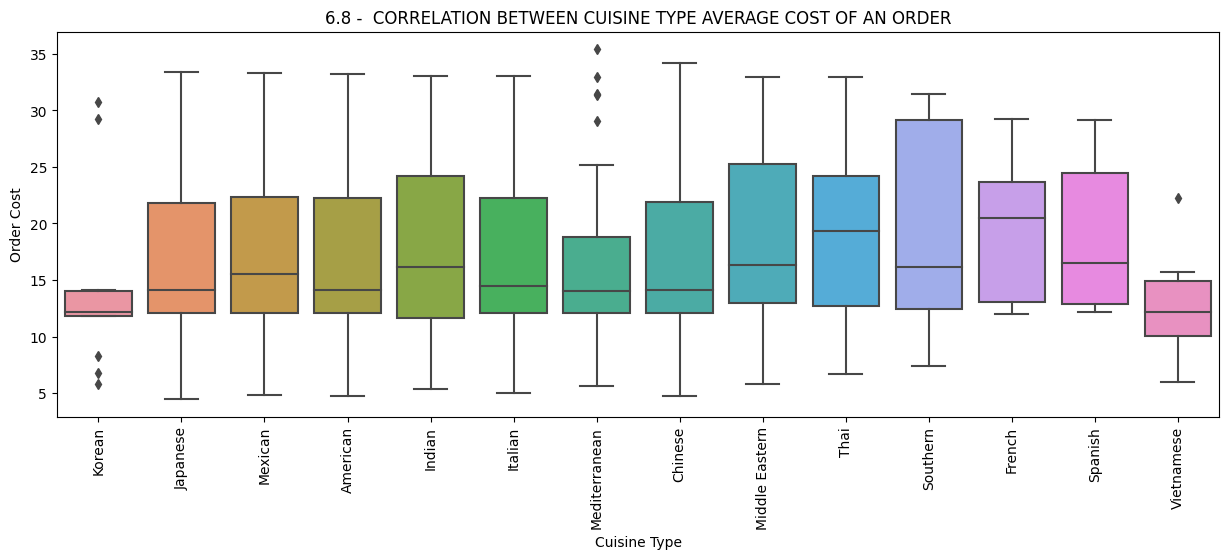

In [ ]:
# 6.8 Correlation between cuisine type and sum of order prices
df.describe(include='all').T

# Create a list of the average price per cuisine type
type_price = df.groupby('cuisine_type')['cost_of_the_order'].mean()
sorted_type_price = type_price.sort_values(ascending=False)
print(sorted_type_price)

# Create chart
plt.figure(figsize = (15,5))
sns.boxplot(data=df, x='cuisine_type', y='cost_of_the_order')

# Customize chart
plt.title('6.8 -  CORRELATION BETWEEN CUISINE TYPE AVERAGE COST OF AN ORDER')
plt.xlabel('Cuisine Type')
plt.xticks(rotation=90, fontsize=10)
plt.ylabel('Order Cost')
plt.show()

#### _6.8 Observations on is there a correlation between cuisine type and order price?_
- Mediterrean cuisine had the most outliers.
- Vietnamese has the least expensive average order, but they also have the least number of orders, as well.
- No cusinine had any larger orders over 35 USD
- Korean cuisine had the smallest order amount of USD
- Overall, Southern cuisine was the most expensive, and has the most order prices over the middle range.




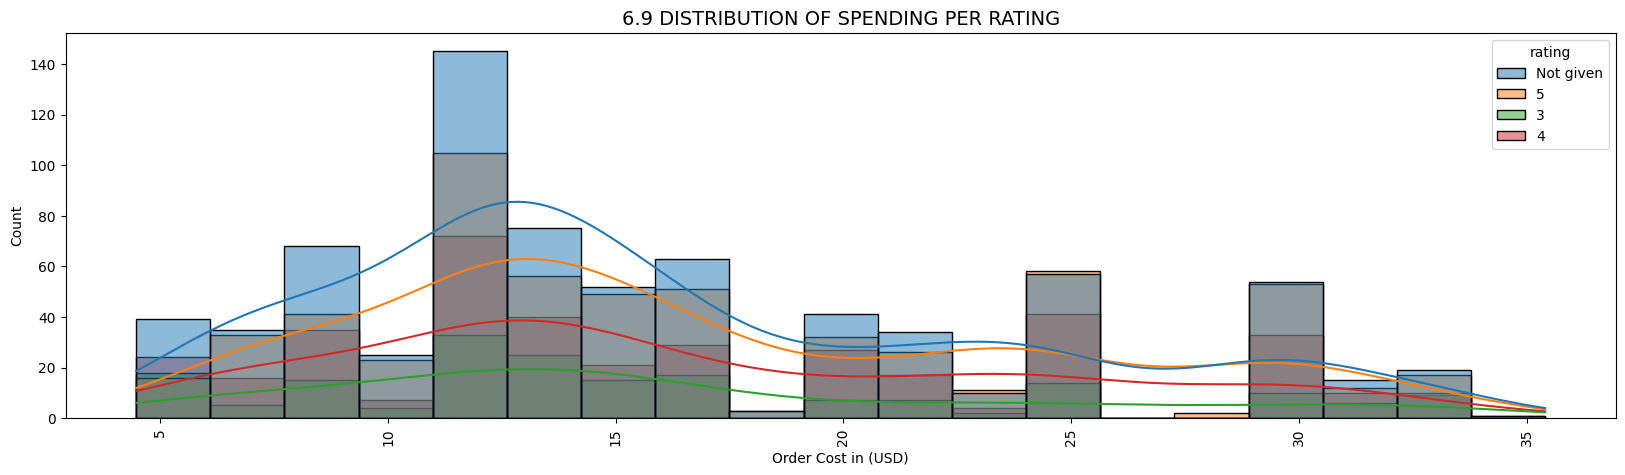

In [ ]:
# 6.9 Distribution of spending per rating

# Create chart
plt.figure(figsize = (20,5))
sns.histplot(data=df, x='cost_of_the_order', hue='rating', kde=True)

# Customize plot
plt.title('6.9 DISTRIBUTION OF SPENDING PER RATING', size=14)
plt.xlabel('Order Cost in (USD)')
plt.xticks(rotation=90, fontsize=10)
plt.ylabel('Count')
plt.show()

####_6.9 Observations on the distribution of spending per rating_
- Overall, ratings that were 'Not given' had the most number of orders.
- The most 'not given' ratings were in the 10 - 15 dollar range.
- The higher the order cost, the more the customer took the time to rate the order.
- The distribution line followed the same path for all of the ratings over the entire order price ranges. There was not a spike or anomoly.

cuisine_type
Vietnamese        26.142857
French            25.333333
Italian           24.567114
Mexican           24.389610
American          24.193493
Japanese          24.131915
Indian            24.082192
Middle Eastern    24.081633
Chinese           23.855814
Southern          23.823529
Mediterranean     23.586957
Spanish           23.416667
Thai              23.157895
Korean            20.923077
Name: delivery_time, dtype: float64
-----------------------------


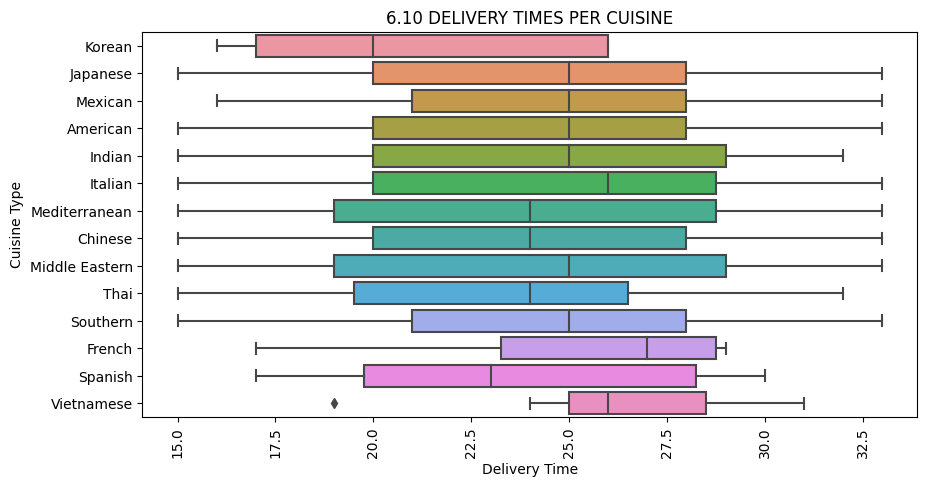

In [ ]:
# 6.10 What are the average delivery times, per cuisine type?
total_reviews = df.groupby('cuisine_type')['delivery_time'].mean()
desc_total_reviews=total_reviews.sort_values(ascending=False)
print(desc_total_reviews)
print('-----------------------------')

# Create chart
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='delivery_time', y='cuisine_type')

# Customize chart
plt.title('6.10 DELIVERY TIMES PER CUISINE')
plt.xlabel('Delivery Time')
plt.xticks(rotation=90, fontsize=10)
plt.ylabel('Cuisine Type')
plt.show()

#### _6.10 Observations for is there a correlation between cuisine type and delivery time?_
- Mediterranean cuisine had the shortest delivery time of 11.637 minutes.
- Mexican cuisine had the longest delivery time of 28.81 minutes.
- Every other cuisine ranged from 15-21 minutes in delivery time.









### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
df['restaurant_name'].value_counts().sort_values(ascending=False).head(5)

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

#### Question #7 Observations:
__The top 5 restaurants in terms of orders received are:__
1. Shake Shack  - 219
2. The Meatball Shop - 132
3. Blue Ribbon Sushi - 119
4. Blue Ribbon Fried Chicken - 96
5. Parm - 68

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [ ]:
weekend_cuisine = df[df['day_of_the_week'] == 'Weekend']['cuisine_type'].value_counts().head(5)
print(weekend_cuisine)

print("---------------------")

# Another way to do this question:
weekend_cuisine_option_2 = df[df['day_of_the_week']=='Weekend']['cuisine_type'].value_counts().sort_values(ascending=False).head(5)
print(weekend_cuisine_option_2)

American    415
Japanese    335
Italian     207
Chinese     163
Mexican      53
Name: cuisine_type, dtype: int64
---------------------
American    415
Japanese    335
Italian     207
Chinese     163
Mexican      53
Name: cuisine_type, dtype: int64


#### Question #8 Observations:
__What is the most popular cuisine type ordered on the weekends (Saturday and Sunday)?__
- American cuisine is the most popular cuisine ordered on the weekends, followed by Japanese, Italian and Chinese.


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
len(df[df['cost_of_the_order']>20])/len(df)*100

29.24130663856691

#### _Question #9 Observations:_
__What percentage of the orders cost more than 20 dollars?__
- The percentage of orders that cost over $20 is: 29.24%.


### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
average_delivery_time=df['delivery_time'].mean()
average_delivery_time_rounded = round(average_delivery_time, 2)
print("The average or mean delivery time is:", average_delivery_time_rounded)

The average or mean delivery time is: 24.16


#### _Question #10 Observations:_
__What is the mean order delivery time?__
- The average delivery time is: 24.16 (minutes)


### **Question 11:**
- The company has decided to give 20% discount vouchers to the top 3 most frequent customers.
- Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
# 1. Groupdata by customer ID and calculate the total number of orders placed for each Customer ID
all_cust_orders = df.groupby('customer_id')['cost_of_the_order'].count()

# 2. Sort the customers based on the number of orders in descending order
sorted_customers = all_cust_orders.sort_values(ascending=False)

# 3. Select the top 3 customers with the highest number of orders
top_3_for_voucher = sorted_customers.head(3)

print("Top 3 customer and their order counts:")
print(top_3_for_voucher)

Top 3 customer and their order counts:
customer_id
52832    13
47440    10
83287     9
Name: cost_of_the_order, dtype: int64


In [ ]:
## BY SUM
# 1. Groupdata by customer ID and calculate the total sum of orders placed for each Customer ID
all_cust_orders = df.groupby('customer_id')['cost_of_the_order'].sum()

# 2. Sort the customers based on the number of orders in descending order
sorted_customers = all_cust_orders.sort_values(ascending=False)

# 3. Select the top 3 customers with the highest number of orders
top_3_for_voucher = sorted_customers.head(3)

print("Top 3 Customers and Their Total Sum Spent")
print(top_3_for_voucher)

Top 3 Customers and Their Total Sum Spent
customer_id
52832     225.80
250494    183.83
47440     158.18
Name: cost_of_the_order, dtype: float64


#### _Question 11 Observations:_
__The question was to solve for total number or orders made per customer, so that data would be as follows:__
1.  52832 - 13 orders
2.  47440 - 10 orders
3.  83287 - 9 orders

__HOWEVER,__ if we were to solve for the top 3 customers that spent the most money, the ranking of customer ids would be as follows.
1. 52832 -  225.80 USD
2. 250494 - 183.83 USD
3. 47440 -  158.18 USD







## __Multivariate Analysis__

### **Question 12**:
- Perform a multivariate analysis to explore relationships between the important variables in the dataset.
  - (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables)
- [10 marks]


<ipython-input-43-6b111dadbca9>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=df[['order_id','customer_id','cost_of_the_order','rating', 'food_preparation_time', 'delivery_time']].corr(), annot=True, cmap='YlGnBu', vmin=-1, vmax=1);


Text(0.5, 1.0, 'HEATMAP OF ALL COLUMNS TO DETERMINE ANY DISPARATE CORRELATIONS')

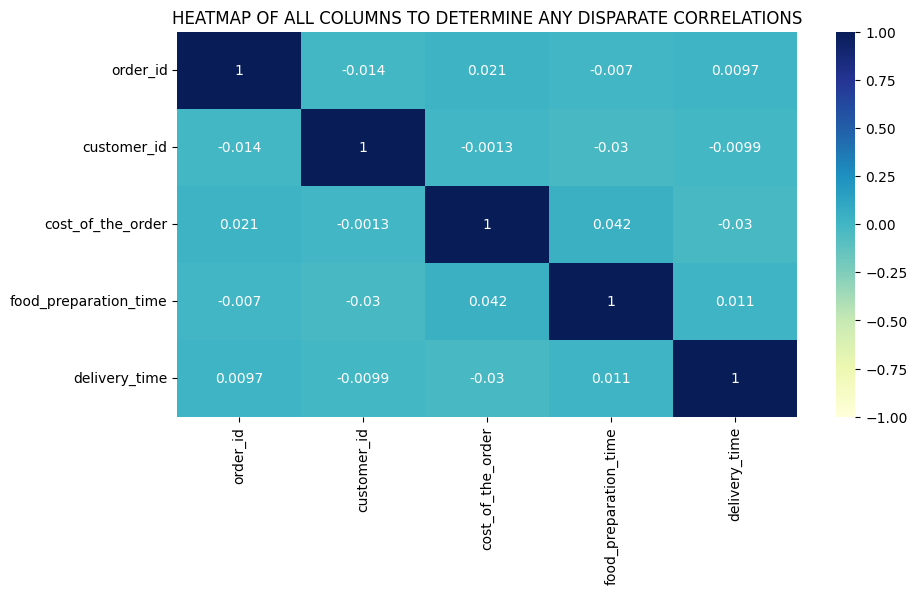

In [ ]:
# Question 12.1 - Is there anything that would indicate that any set of customer_ids would decrease food preparation time or deliver time?
#print(df.corr())
# plotting correlation heatmap
plt.figure(figsize=(10,5))
sns.heatmap(data=df[['order_id','customer_id','cost_of_the_order','rating', 'food_preparation_time', 'delivery_time']].corr(), annot=True, cmap='YlGnBu', vmin=-1, vmax=1);
plt.title('HEATMAP OF ALL COLUMNS TO DETERMINE ANY DISPARATE CORRELATIONS')

#### _12.1 Observations for is there a correlation bewteen customer IDs and food prep or delivery times?_
- There is no correlation indicating that particular customer ID have a faster food prep or delivery time.

cuisine_type
American          41
Chinese           16
French             3
Indian            14
Italian           31
Japanese          29
Korean             5
Mediterranean      5
Mexican           11
Middle Eastern     7
Southern           2
Spanish            3
Thai               9
Vietnamese         3
Name: restaurant_name, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

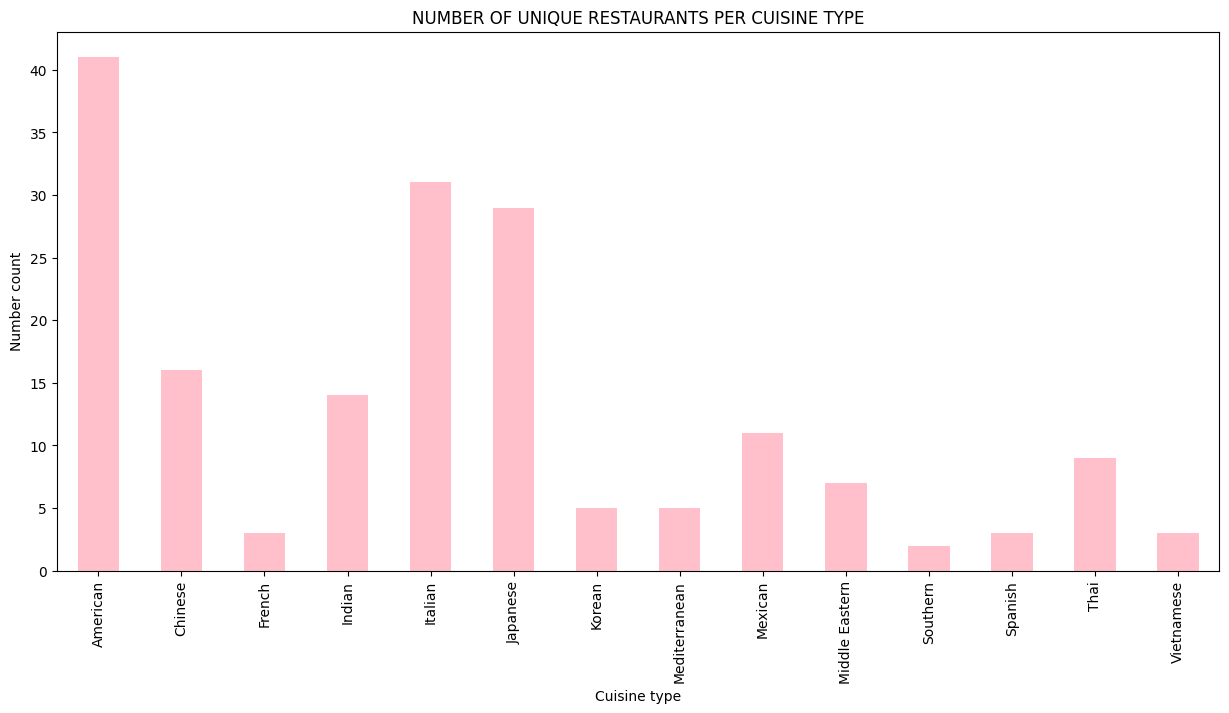

In [ ]:
# Question 12.2 - How many unique restaurants are there by cuisine type?
# 1. Show table values
restaurants_per_cuisine = df.groupby('cuisine_type')['restaurant_name'].nunique()
print(restaurants_per_cuisine)

# Create chart
plt.figure(figsize = (15,7))
restaurants_per_cuisine.plot(kind='bar', color='pink')

# Customize chart
plt.title('NUMBER OF UNIQUE RESTAURANTS PER CUISINE TYPE')
plt.xlabel('Cuisine type')
plt.ylabel('Number count')
plt.xticks(rotation=90, fontsize=10)
plt.show

#### _12.2 Observations for how many unique restaurants are there by cuisine type?_
- American cuisine has the most restaurants, at 41 restaurants.
- Italian cuisine, which is similar to American cuisine, was number two, at 31 restaurants.
- Asian cuisine came in third, with both Japanese and Chinese having the next highest counts.
- Spanish, Vietnamese, and French cuisines all had 3 restaurants, per cuisine.
- Southern cuisine only had 2 restaurants.



American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Name: cuisine_type, dtype: int64
-------------
American          169
Japanese          135
Italian            91
Chinese            52
Mexican            24
Indian             24
Middle Eastern     17
Mediterranean      14
Southern            6
French              5
Name: cuisine_type, dtype: int64
-------------


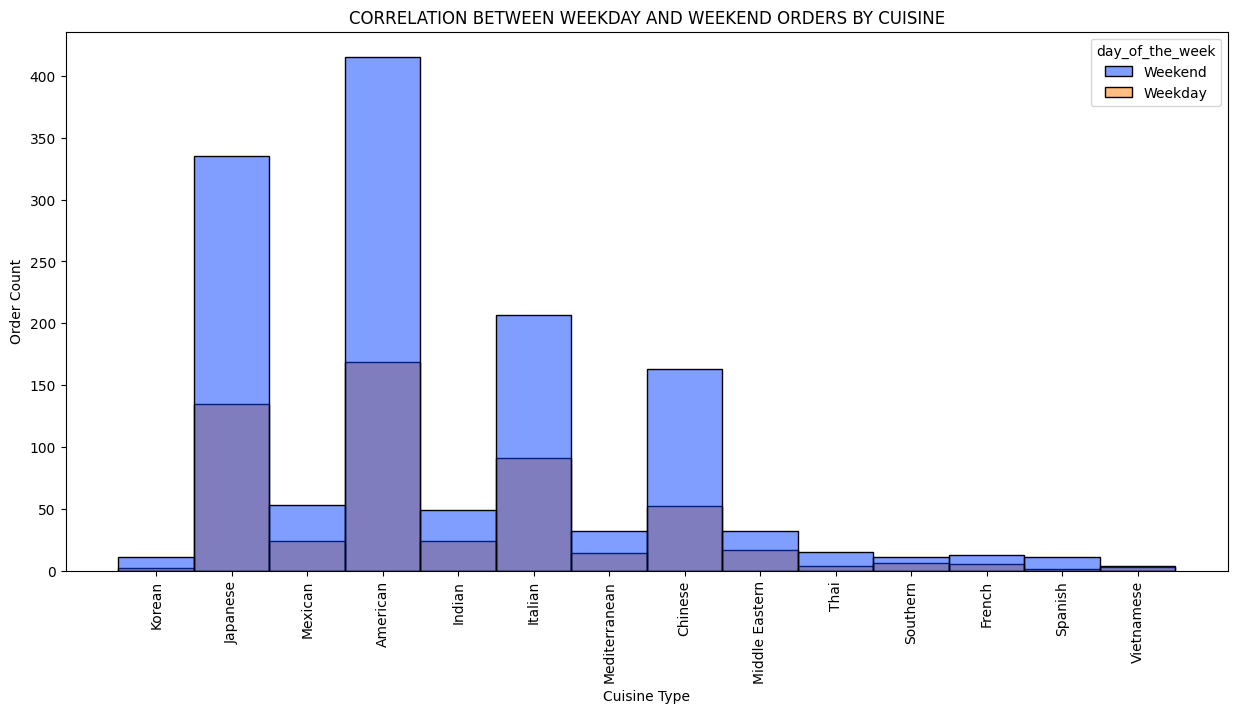

In [ ]:
# 12.3 Is there a correlation between weekday and cuisine type? Do more people order certain cuisines on weekdays, or weekends?
weekend_cuisine = df[df['day_of_the_week'] == 'Weekend']['cuisine_type'].value_counts().head(10)
print(weekend_cuisine)
print("-------------")

weekday_cuisine = df[df['day_of_the_week'] == 'Weekday']['cuisine_type'].value_counts().head(10)
print(weekday_cuisine)
print("-------------")

# Create chart
plt.figure(figsize = (15,7))
sns.histplot(data=df,x="cuisine_type", hue="day_of_the_week", palette = 'bright', bins=10)

# Customize chart
plt.title('CORRELATION BETWEEN WEEKDAY AND WEEKEND ORDERS BY CUISINE')
plt.xlabel('Cuisine Type')
plt.ylabel('Order Count')
plt.xticks(rotation=90, fontsize=10)
plt.show()

#### _12.3 Observations for are there any correlations between weekday vs weekend orders and cuisine type?_
- Overall, all of the cuisines have more orders placed on the weekend vs. the weekdays.
- American had the most number of orders place both weekdays and weekends.
- French had the least amount of orders placed both weekdays and weekends.

rating
5            16.965697
4            16.710337
3            16.223351
Not given    16.085340
Name: cost_of_the_order, dtype: float64


<Figure size 1500x700 with 0 Axes>

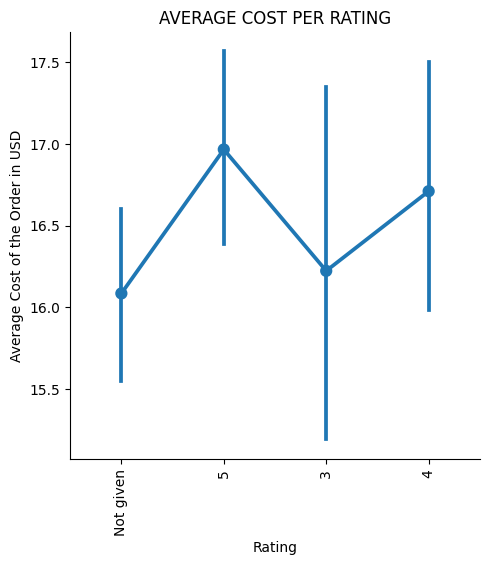

In [ ]:
# 12.4 - What is the average cost per rating?
# Create table
avg_cost_rating = df.groupby('rating')['cost_of_the_order'].mean()
desc_avg_cost_rating=avg_cost_rating.sort_values(ascending=False)
print(desc_avg_cost_rating)

# Create chart
plt.figure(figsize = (15,7))
sns.catplot(data=df, x='rating', y="cost_of_the_order", kind='point', estimator=np.mean)

# Customize chart
plt.title('AVERAGE COST PER RATING')
plt.xlabel('Rating')
plt.xticks(rotation = 90, fontsize=10)
plt.ylabel('Average Cost of the Order in USD')
plt.show();

####_12.4 Observations for is there a correlation between rating and order cost?_
- Totals are:
  - 5  -          16.965697
  - 4  -          16.710337
  - 3 -           16.223351
  - Not given -   16.085340
- Ratings 4 and 5 had higher average costs.
- Rating 3 had some of the lowest average costs per order, around 5.00 USD.
- Rating 3 also looked like it was given by customers the most times.

rating
3            27.430851
4            27.396373
5            27.355442
Not given    27.357337
Name: food_preparation_time, dtype: float64


<Figure size 1000x500 with 0 Axes>

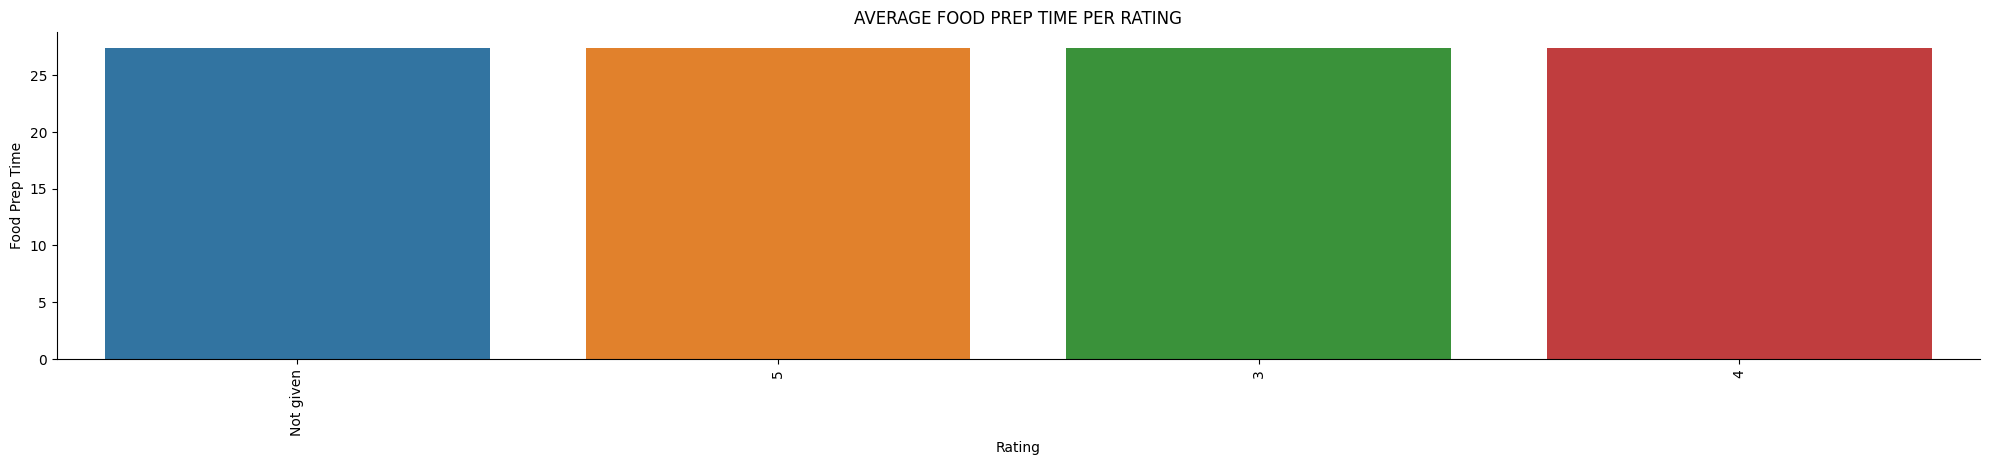

In [ ]:
# 12.5 - Is there a correlation between food prep time and rating?
# Get data
avg_prep_rating = df.groupby('rating')['food_preparation_time'].mean()
print(avg_prep_rating)

# Create chart
plt.figure(figsize = (10,5))
sns.catplot(data=df, x='rating', y='food_preparation_time', kind='bar', estimator=np.mean, height=4, aspect =5, errorbar=None)

# Customize chart
plt.title('AVERAGE FOOD PREP TIME PER RATING');
plt.xlabel('Rating')
plt.xticks(rotation = 90, fontsize=10)
plt.xlabel('Rating')
plt.ylabel('Food Prep Time')
plt.show();

#### _12.5 Observations on is there a correlation between food prep time and rating?_
- There is no correlation between food prep time and rating. All of the ratings were around the 27 minute mark for average prep time.
  - 3 -           27.430851
  - 4 -           27.396373
  - 5 -           27.355442
  - Not given -    27.357337

The sum of all of the orders is: 31314.82
cuisine_type
American          9530.78
Japanese          7663.13
Italian           4892.77
Chinese           3505.62
Mexican           1303.85
Indian            1235.14
Middle Eastern     922.21
Mediterranean      711.84
Thai               364.95
French             356.29
Southern           328.11
Spanish            227.93
Korean             182.02
Vietnamese          90.18
Name: cost_of_the_order, dtype: float64


<Figure size 1500x700 with 0 Axes>

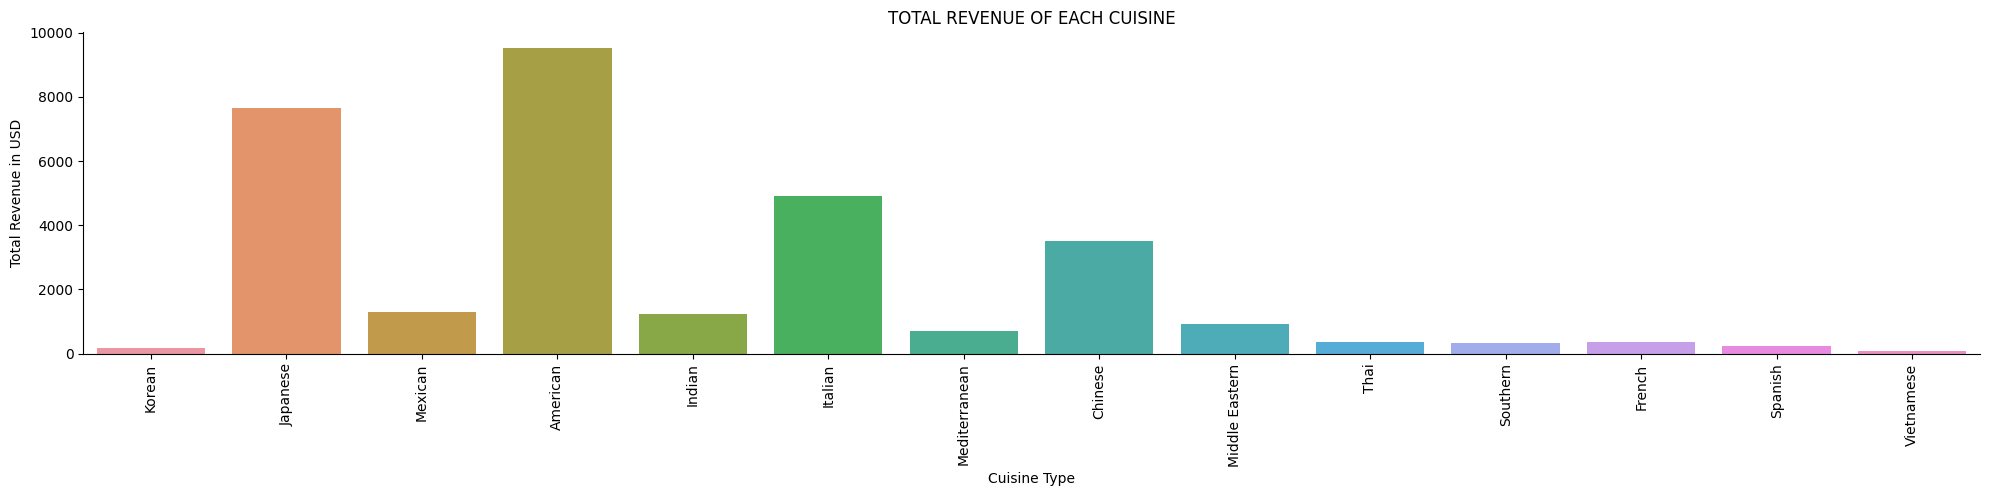

In [ ]:
# 12.6 WHAT IS THE TOTAL REVENUE PER CUISINE
# Get list in descending order
sum_of_all_orders = df['cost_of_the_order'].sum().sum()
print('The sum of all of the orders is:', sum_of_all_orders)

total_revenue_cuisine = df.groupby('cuisine_type')['cost_of_the_order'].sum()
descending_order = total_revenue_cuisine.sort_values(ascending=False)
print(descending_order)

# Create chart
plt.figure(figsize = (15,7))
sns.catplot(data=df, x='cuisine_type', y='cost_of_the_order', kind='bar', estimator=np.sum, height=4, aspect =5, errorbar=None);

# Customize chart
plt.title('TOTAL REVENUE OF EACH CUISINE');
plt.xticks(rotation = 90)
plt.title('TOTAL REVENUE OF EACH CUISINE');
plt.xlabel('Cuisine Type')
plt.xticks(rotation = 90, fontsize=10)
plt.ylabel('Total Revenue in USD')
plt.show()

#### _12.6 Observations on the total revenue of each cuisine._
__This observation is to just gain an understanding of which cuisine generates the most revenue__
- Out of the total of all orders, which is 31,314.82 USD, American and Japanese cuisines account for half of all revenue (17103.91 USD).
- Vietnamese cuisine had the lowest total sum of 90.18.
  - They also had the lowest order count, the the least number of restaurants per this particular cuisine type.



The sum of all of the orders is: 31314.82
------------------------------------------
restaurant_name
Shake Shack                   3579.53
The Meatball Shop             2145.21
Blue Ribbon Sushi             1903.95
Blue Ribbon Fried Chicken     1662.29
Parm                          1112.76
                               ...   
Market Table                     6.79
Wa Jeal                          6.74
Cipriani Le Specialita           5.92
Big Wong Restaurant _¤¾Ñ¼       5.92
Hunan Manor                      5.72
Name: cost_of_the_order, Length: 178, dtype: float64


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:118: UserWarning: Glyph 140 (\x8c) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:118: UserWarning: Glyph 142 (\x8e) missing from current font.
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2000x700 with 0 Axes>

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 140 (\x8c) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 142 (\x8e) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


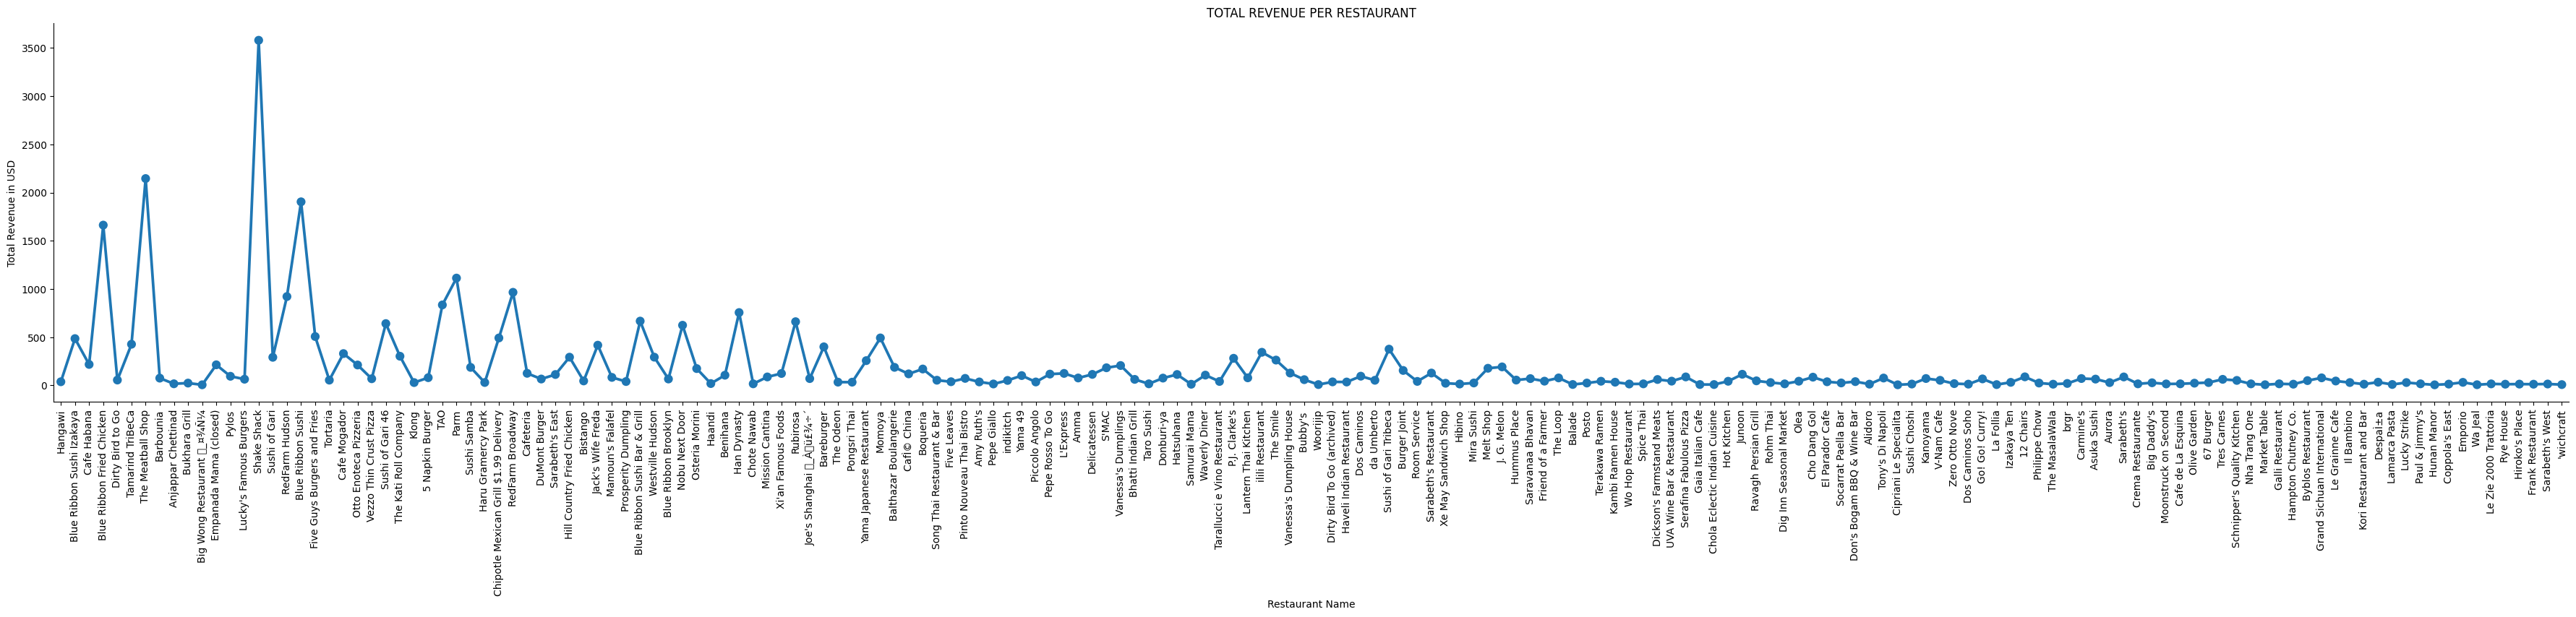

In [ ]:
#12.7 WHAT IS THE TOTAL REVENUE PER RESTAURANT
# 1. What is the sum of all orders
sum_of_all_orders = df['cost_of_the_order'].sum().sum()
print('The sum of all of the orders is:', sum_of_all_orders)
print('------------------------------------------')

# 2. Sort the sum in descending values
total_revenue_restaurant = df.groupby('restaurant_name')['cost_of_the_order'].sum()

# Display all the restaurant names
desc_restaurant_sums = total_revenue_restaurant.sort_values(ascending=False)
print(desc_restaurant_sums)

# Create chart
plt.figure(figsize = (20,7))
sns.catplot(data=df, x='restaurant_name', y='cost_of_the_order', kind='point', estimator=np.sum, height=6, aspect =6, errorbar=None);

# Customize chart
plt.title('TOTAL REVENUE PER RESTAURANT');
plt.xlabel('Restaurant Name')
plt.xticks(rotation = 90, fontsize=10)
plt.ylabel('Total Revenue in USD')
plt.show()

#### _12.7 Observations on total revenue per restaurant_
__This observation is to get the total revenue of each restaurant.__
- Of the total revenue for all restaurants (31314.82 USD), the 5 restaurants listed below accounted for 33 percent of all sales.
  - (10403.74/ 31314.82)= .3322
1. Shake Shack -                   3579.53
2. The Meatball Shop -             2145.21
3. Blue Ribbon Sushi -             1903.95
4. Blue Ribbon Fried Chicken -     1662.29
4. Parm  -                         1112.76

<Figure size 2000x700 with 0 Axes>

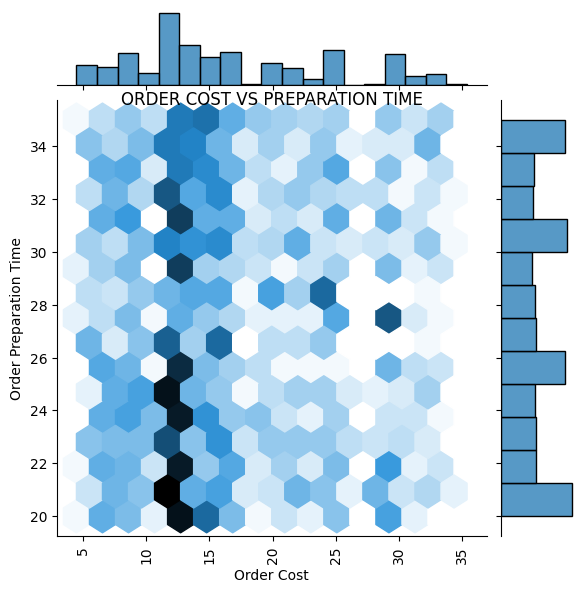

In [ ]:
#12.8 IS THERE A CORRELATION BETWEEN THE COST OF AN ORDER AND ITS PREPARATION TIME?

# Create chart
plt.figure(figsize = (20,7))
sns.jointplot(data = df, x = 'cost_of_the_order', y = 'food_preparation_time', kind = 'hex')

# Customize chart
plt.title('ORDER COST VS PREPARATION TIME',y=0.97);
plt.xlabel('Order Cost')
plt.xticks(rotation = 90, fontsize=10)
plt.ylabel('Order Preparation Time')
plt.show()

#### _12.8 Observations for is there a correlation between the average cost of an order and its preparation time?_
- Order costs seem to be densely populated around the 12 USD mark, and within a range of 20 - 25 minutes.

rating
3            24.558511
4            23.867876
5            24.212585
Not given    24.173913
Name: delivery_time, dtype: float64


<Figure size 1500x700 with 0 Axes>

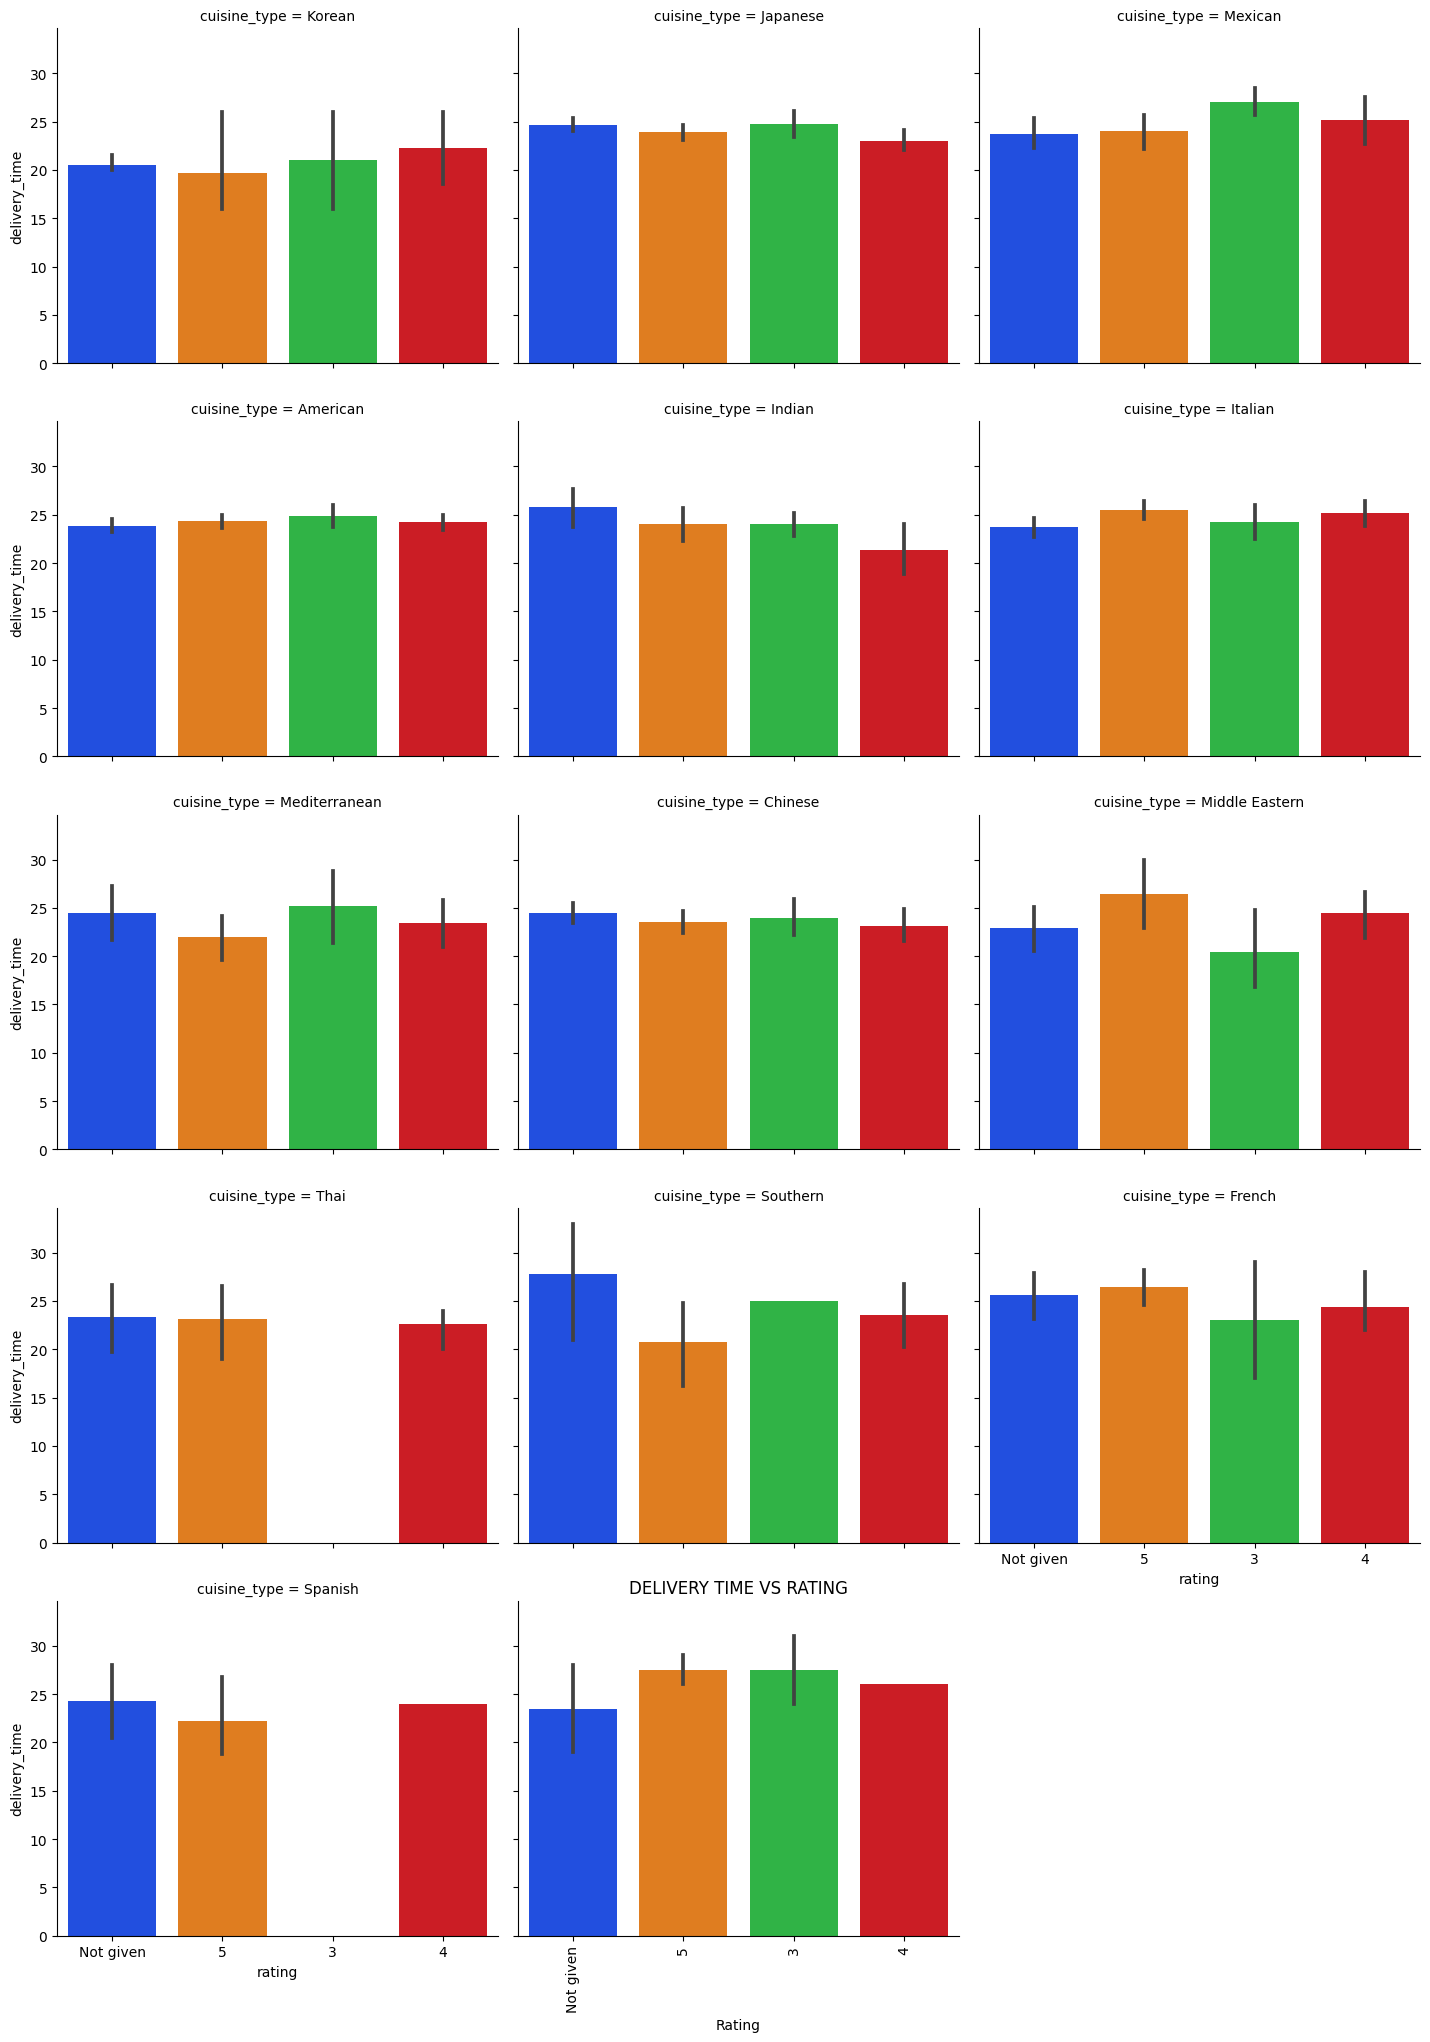

In [ ]:
#12.9 DELIVERY TIME VS RATING
# Create table
speed_rating = df.groupby('rating')['delivery_time'].mean()
print(speed_rating)

# Create chart
plt.figure(figsize = (15,7))
sns.catplot(data=df, x="rating", y="delivery_time", col="cuisine_type", kind='bar', palette='bright', col_wrap=3, height=4, aspect=1.2)

# Customize chart
plt.title('DELIVERY TIME VS RATING');
plt.xticks(rotation = 90, fontsize=10)
plt.xlabel('Rating')
plt.ylabel('Delivery Time in Minutes')
plt.show()

#### _12.9 Observations for is there a correlation between deliver time and rating, by cuisine type?_
- Overall there is not a correlation between delivery times and ratings.
  - 3 -           24.558511
  - 4 -           23.867876
  - 5  -          24.212585
  - Not given  -  24.173913
- AMERICAN ratings did not show any significant correlation bewteen the speed of order delivery and a higher rating.
- SOUTHERN showed a significant difference between delivery time and ratings.

### **Question 13:**
- The company wants to provide a promotional offer in the advertisement of the restaurants.
- The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4.
- Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
# Steps 1-5

# 1. Turn 'Not given' values into a zero value
df['new_rating'] = df['rating'].replace('Not given', 0)
print('------------------------------------')

# 2. Convert the rating column created above from an object to integer datatype
df['new_rating'] = df['new_rating'].astype('int64')
df.info()
print('------------------------------------')

#3. Create a data set of Restaurants with a consideration of mean rating greater than 4. The rating eliminates all unrated rows in calculating the mean
df4 = df[['restaurant_name','new_rating']][df['new_rating']!= 0].groupby('restaurant_name').count()> 4
df4.reset_index(inplace=True)
print(df4)
print('------------------------------------')

# 4. Get all the restaurant names that have a rating count of more than 50
df50 = df[['restaurant_name','new_rating']][df['new_rating']!=0].groupby('restaurant_name').count()> 50
df50.reset_index(inplace=True)
print(df50)
print('------------------------------------')

# 5.  Create a set of Restaurants that meet both conditions using merge
promo_rest = pd.merge(df4[df4['new_rating']== True], df50[df50['new_rating']== True],on ='restaurant_name')
print('------------------------------------')
# Return the set of qualified restaurants only
print(promo_rest)

------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
 9   new_rating             1898 non-null   int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 148.4+ KB
------------------------------------
      restaurant_name  new_rating
0          'wichcraft       False
1           12 Chairs       False
2     5 Napkin Burger       F

#### _Question #13 Observations_
- The following restaurants qualify for the promotional offer:
 1. Blue Ribbon Fried Chicken
 2. Blue Ribbon Sushi
 3. Shake Shack
 4. Meatball Shop

### **Question 14:**
- The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars.
- Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
sum = 0
for i in df['cost_of_the_order']:
    if (i > 20):
        sum = sum + (i*0.25)
    elif (5 < i < 20):
        sum = sum + (i*0.15)
    else:
        sum = sum + (i*0)
print('Net revenue on all orders is:', "{:.2f}".format(sum))

Net revenue on all orders is: 6166.30


#### _Question #14 Observations:_
- The net revenue on all orders is: 6166.30 USD.


### **Question 15:**
- The company wants to analyze the total time required to deliver the food.  
- What percentage of orders take more than 60 minutes to get delivered from the time the order is placed?
  - (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
 #Create a new column to hold the computed value for total time required
df['total_delivery_time'] = df['food_preparation_time']+df['delivery_time']
# Review to confirm the new column
df.head()

#Compute the percentage of orders taking more than 60 minutes
total_observations = df['total_delivery_time'].count()
print('Total number of orders is:', total_observations)

totaltime_above60 = df['total_delivery_time'][df['total_delivery_time']> 60].count()
print('The total number of orders taking over 60 minutes to deliver are:', totaltime_above60)

percent_totaltime_above60 = round((totaltime_above60/total_observations)*100,2)
print('The percentage of orders that take over 60 minutes to deliver are:',percent_totaltime_above60)

Total number of orders is: 1898
The total number of orders taking over 60 minutes to deliver are: 200
The percentage of orders that take over 60 minutes to deliver are: 10.54


#### _Question #15 Observations:_
- Almost 11% of all orders go past the 60 minute mark in order to prep and deliver.


### **Question 16:**
- The company wants to analyze the delivery time of the orders on weekdays and weekends.
- How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
total_delivery_time = df['delivery_time'].mean()
print('The average delivery time overall is:', total_delivery_time)
print("----------------")
avg_del_time = df.groupby('day_of_the_week')['delivery_time'].mean()
print('The average delivery times broken up by weekdays and weekends is:', avg_del_time);


The average delivery time overall is: 24.161749209694417
----------------
The average delivery times broken up by weekdays and weekends is: day_of_the_week
Weekday    28.340037
Weekend    22.470022
Name: delivery_time, dtype: float64


#### _Question # 16 Observations:_
The average delivery time on weekdays is __greater__ than during the weekend.
- The average delivery time overall is 24.16 minutes
- Weekday average delivey time is 28.34
- Weekend average delivery time is 22.47




## Conclusion and Recommendations

### **Question 17:**
__1. What are your conclusions from the analysis?__
- <u>*Analysis on the specific cuisine types*</u>
  -  __American__ cuisine is the most popular in theres of the most ratings, the most frequently orders, the number of restaurants associated with this particular cuisine type, the favorite among our top cusotmers, and is the top ranking in terms of the sum of all orders.
    - American also has a less expensive average order price of 16 USD compared to other cuisines.
    - It is also more frequently ordered on the weekends.
    - It is in the median of delivery times with a 24 minute delivery time
    - It also has one of the longest food prep times.
    - It would be assumed that __Southern__ cuisine would be similar to American cuisine, but it is one of the lowest ranking cuisines across the board.
  - __Japanese__ cuisine comes in second in terms of all of the information listed above, and with a little over 1/2 of the restaurants with this cuisine type of American. The average order cost is also 16 USD, which is what American cuisine is also.
  - __Italian__ cuisine ranks third in popularity and the other items mentioned for both American and Japanese cuisine. However, All totals are half of what American cuisine has, and a little more than 1/2 of what the Japanese cuisine totals are. Italian and American cuisines seem to mirror one another or follow the same trends, indicating that there is an overlap in their cuisine types offered to our customers.
  - In looking at the Asian cuisine types of __Japanese, Chinese, Thai__, and __Vietnamese__, with the exception of Japanese, the other three have very little to nomimal orders, popularity, or restaurants associated with them.
  - __Vietnamese__ cuisine came in last  with only 10 orders, 3 restaurants associated with it, but the average delivery time was the highest in all categories. However, Vietnamese cuisine was the only cuisine more popular during the weekdays.

  - __Mediterrean and Middle East__ cusinines share roughly the same values in all categories.
  - It would be assumed that both __Mexican and Spanish__ cuisines would shaer similar values, but Spanish cuisine is only 1/2 has popular as Mexican cuisine.
  - Out of the total of all orders, which is 31,314.82 USD, American and Japanese cuisines account for half of all revenue (17103.91 USD).
  - Of the total revenue for all restaurants (31314.82 USD), the 5 restaurants listed below accounted for 33 percent of all sales. (10403.74/ 31314.82)= .3322
    1. Shake Shack - 3579.53 USD
    2. The Meatball Shop - 2145.21 USD
    3. Blue Ribbon Sushi - 1903.96 USD
    4. Blue Ribbon Fried Chicken - 1661.29 USD
    5. Parm - 1112.76 USD

- <u>_Ratings_</u>
  - There is no correlation between the average cost of an order and rating. All of the ratings were between 16.00 - 17.00 in terms of cost, irregardless of the rating.
  - There is no correlation between food preparation time and rating. All of the ratings have a food prep time of around 27 minutes.
  - There is no correlation between delivery times (minutes) and rating.
    - 3 - 24.55
    - 4 - 23.87
    - 5 - 24.21
    - Not given - 24.17
    - However, if you break this up by cuisine, Southern cuisine showed the most significant difference between delivery time and ratings.

  - The majority of the ratings given were 3,4,5, with is roughly 84% of all ratings. There are no 1 or 2 ratings given.
  - Only 736 out of 1898 orders provided a rating. Almost 40 percent of orders are missing ratings.
  - Order costs seem to be densely populated around the 12 USD mark, and within a range of 20 - 25 minutes.

__2. What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]__

  - <u>*Incentives to increase number of orders during the weekdays*</u>
    - Since the most popular cuisines are American and Japanese, and generate the most revenue, offer some sort of discount or incentive during the week days to bring in more revenue. This would work for all of the restaurants as well as orders almost double during the weekends.
    - Work with the restaurants to ensure that all items are listed in the app. Also, is it easy to make an order, and is Apple Pay offered? How easy is it for the customers to actually complete the transaction?
    - There could also be a lack of drivers during the weekdays. Foodhub could offer an incentive to increase the number of drivers for FoodHub, during the day.
    - Analyze what city areas orders are coming in from during the week day. For instance, during the weekend, a majority of orders are most likely being delivered to customer's homes. However, weekday orders may be going to work places.

- <u>*Increase overall ratings*</u>
    - Offer an incentive for customers to give a rating for a restaurant.
    - Test the app to see how easy it is for a customer to give a rating, and make improvements in the app so that it is easier for the customer to give a rating.
    - Determine why there are no 1 or 2 ratings.

- <u>*Increase ratings for lower ranking cuisines*</u>
    - Verify that the reason for the low order count is not due to difficulty of order completion in the app.
    - Other reasons for low order count could include, food quality, niche cuisine type, or lack of delivery drivers or personnel needed to complete the order.
- <u>*Reduce the over 60 minutes delivery times*</u>
  - 10.5 percent of orders are taking over 60 minutes to deliver. Determine the reasons that these orders are taking longer, and come up with a solution to reduce that percentage.

---

In [ ]:
!pip install nbconvert

In [ ]:
!jupyter nbconvert --to html /content/drive/MyDrive/Week4ExploratoryDataAnalysis/Lora_Rose_PYF_Project_LearnerNotebook_FullCode.ipynb

[NbConvertApp] Converting notebook /content/drive/MyDrive/Week4ExploratoryDataAnalysis/Lora_Rose_PYF_Project_LearnerNotebook_FullCode.ipynb to html
[NbConvertApp] Writing 2470948 bytes to /content/drive/MyDrive/Week4ExploratoryDataAnalysis/Lora_Rose_PYF_Project_LearnerNotebook_FullCode.html
